In [2]:
import pandas as pd
import numpy as np
# CSVファイルを読み込む
train = pd.read_csv('input/train.csv')
test = pd.read_csv('input/test.csv')
print("train_data;",len(train))
print("test_data;",len(test))

train_data; 1000
test_data; 1000


In [3]:
# データの可視化
train.describe()

,id,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,target
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,999.734000,57.632000,0.41600,605.359000,0.270000,36.691000,0.237000,278330.242337,1.030258,136.841000,0.755000,0.25600,149.560000,0.198000
std,578.002214,9.875328,0.49314,971.937382,0.444182,11.037089,0.425455,79543.675235,0.704616,3.405777,0.430302,0.43664,77.381072,0.398692
min,0.000000,39.000000,0.00000,23.000000,0.000000,14.000000,0.000000,138173.134500,0.629178,116.000000,0.000000,0.00000,4.000000,0.000000
25%,496.750000,50.000000,0.00000,93.000000,0.000000,30.000000,0.000000,256629.434900,0.798218,135.000000,1.000000,0.00000,84.500000,0.000000
50%,1007.500000,58.000000,0.00000,255.000000,0.000000,35.000000,0.000000,267025.054700,0.844389,136.500000,1.000000,0.00000,185.000000,0.000000
75%,1512.250000,61.000000,1.00000,582.000000,1.000000,40.000000,0.000000,279943.418975,0.956294,139.000000,1.000000,1.00000,213.000000,0.000000
max,1998.000000,85.000000,1.00000,7861.000000,1.000000,70.000000,1.000000,824131.916700,8.994597,146.000000,1.000000,1.00000,285.000000,1.000000


In [4]:
test.describe()

,id,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
count,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,999.26600,58.221000,0.38200,576.722000,0.288000,37.195000,0.245000,277448.502756,1.029092,136.851000,0.756000,0.266000,144.869000
std,577.27564,10.157132,0.48612,908.726074,0.453058,11.479318,0.430302,85625.028062,0.688246,3.651045,0.429708,0.442085,78.195271
min,1.00000,40.000000,0.00000,23.000000,0.000000,17.000000,0.000000,117373.947400,0.627076,116.000000,0.000000,0.000000,7.000000
25%,504.50000,50.000000,0.00000,84.000000,0.000000,25.000000,0.000000,255598.445400,0.793282,136.000000,1.000000,0.000000,79.750000
50%,995.50000,58.000000,0.00000,231.000000,0.000000,35.000000,0.000000,267212.471150,0.839786,136.000000,1.000000,0.000000,172.000000
75%,1487.75000,66.000000,1.00000,582.000000,1.000000,45.000000,0.000000,279969.260275,0.948659,140.000000,1.000000,1.000000,213.000000
max,1999.00000,84.000000,1.00000,7861.000000,1.000000,60.000000,1.000000,859856.405100,9.189842,148.000000,1.000000,1.000000,285.000000


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1000 non-null   int64  
 1   age                       1000 non-null   int64  
 2   anaemia                   1000 non-null   int64  
 3   creatinine_phosphokinase  1000 non-null   int64  
 4   diabetes                  1000 non-null   int64  
 5   ejection_fraction         1000 non-null   int64  
 6   high_blood_pressure       1000 non-null   int64  
 7   platelets                 1000 non-null   float64
 8   serum_creatinine          1000 non-null   float64
 9   serum_sodium              1000 non-null   int64  
 10  sex                       1000 non-null   int64  
 11  smoking                   1000 non-null   int64  
 12  time                      1000 non-null   int64  
 13  target                    1000 non-null   int64  
dtypes: float6

In [6]:
### train dataの前処理を実施

Abnormal rate is 1    0.198
Name: target, dtype: float64


Text(0.05, 0.92, 'fraud rate  = 0.198')

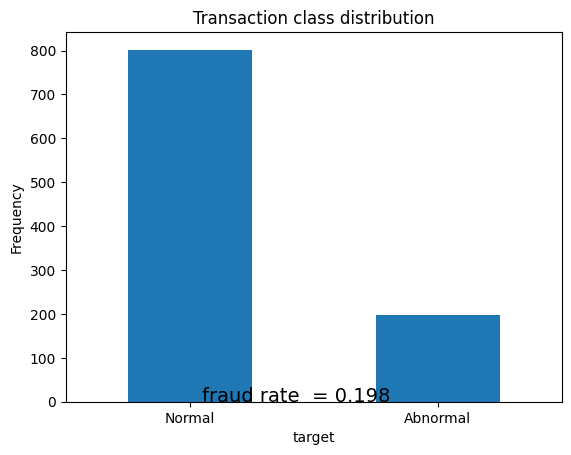

In [7]:
# 正常データと異常データの頻度を確認
import matplotlib.pyplot as plt
LABELS = ["Normal", "Abnormal"]

frauds = train[train.target == 1]
frauds_num = frauds['target'].value_counts()
normal = train[train.target == 0]
normal_num = normal['target'].value_counts()
rate = frauds_num / (frauds_num[1] + normal_num[0])
print("Abnormal rate is {}".format(rate))
count_classes = pd.value_counts(train['target'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("target")
plt.ylabel("Frequency")
plt.text(0.05, 0.92, 'fraud rate  = {}'.format(rate[1]), fontsize = 14)

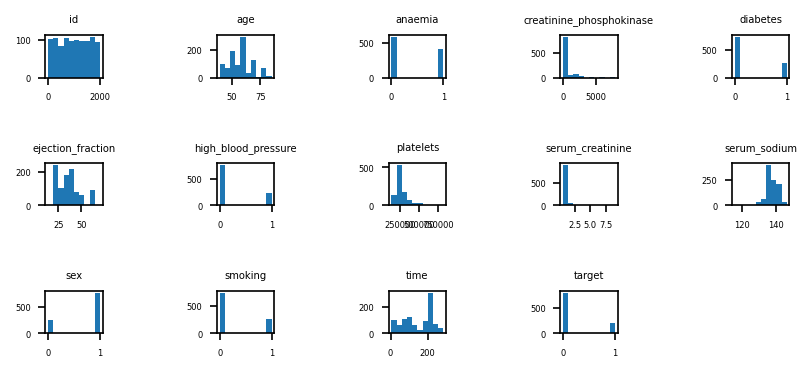

In [8]:
fig = plt.figure(dpi=150)
for i, col in enumerate(train.columns):
    plt.rcParams["font.size"] = 4
    plt.subplots_adjust(wspace=2, hspace=2)
    # plt.figure(figsize=(4, 4))
    plt.subplot2grid((5, 5), (i//5 ,i%5))
    plt.hist(train[col])
    plt.title(col)


In [9]:
# スコア低下したので除外
# # 最小値を0ではなく一番小さい値にする
# tx_amount_min = train_total[train_total.TX_AMOUNT > 0].TX_AMOUNT.min()
# per_terminal_min = train_total[train_total.per_terminal > 0].per_terminal.min()
# per_customer_min = train_total[train_total.per_customer > 0].per_customer.min()
# print(tx_amount_min)
# train_total["TX_AMOUNT"] += tx_amount_min
# train_total["per_terminal"] += per_terminal_min
# train_total["per_customer"] += per_customer_min
# train_total.describe()

In [10]:
# # 対数変換
# log_list = ["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium"]
# fig = plt.figure(dpi=150)
# for i,indent in enumerate(log_list):
#     plt.rcParams["font.size"] = 4
#     plt.subplots_adjust(wspace=2, hspace=2)
#     train[indent] = np.log(train[indent])
#     test[indent] = np.log(test[indent])
#     plt.subplot2grid((5, 5), (i//5 ,i%5))
#     plt.hist(train[indent])
#     plt.title(indent)
# train.describe()

In [11]:
### test dataも同様に前処理を実施

In [12]:
# # 最小値を0ではなく一番小さい値にする
# tx_amount_min = test_total[test_total.TX_AMOUNT > 0].TX_AMOUNT.min()
# per_terminal_min = test_total[test_total.per_terminal > 0].per_terminal.min()
# per_customer_min = test_total[test_total.per_customer > 0].per_customer.min()
# print(tx_amount_min)
# test_total["TX_AMOUNT"] += tx_amount_min
# test_total["per_terminal"] += per_terminal_min
# test_total["per_customer"] += per_customer_min
# test_total.describe()

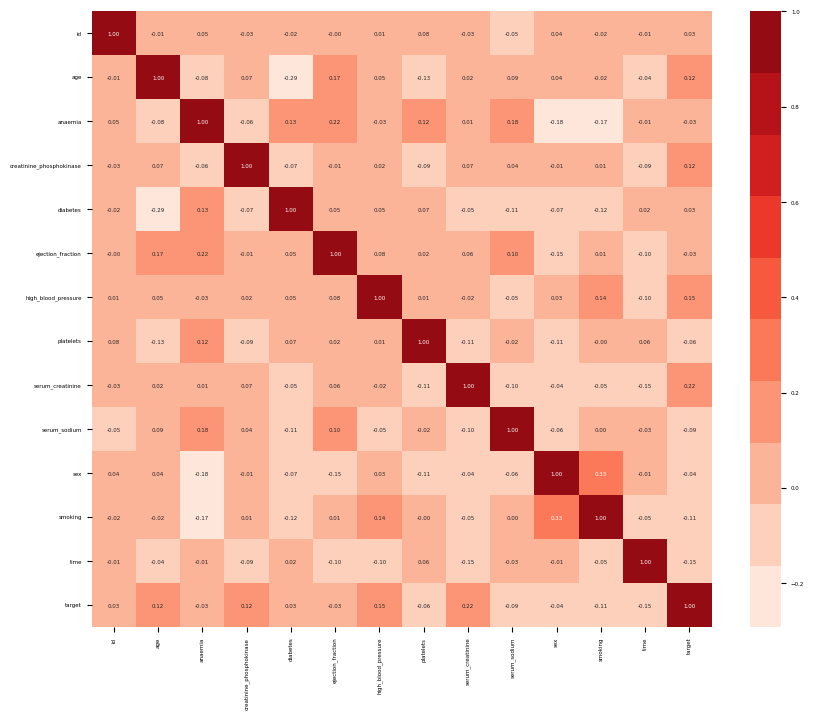

In [13]:
# 情報量が多く処理が完了しないので8月までのデータでヒートマップ算出する
import seaborn as sns
%matplotlib inline
corrs = np.corrcoef(train, rowvar=False)
fig,ax = plt.subplots(figsize=(10,8))

sns.heatmap(corrs, cmap=sns.color_palette('Reds', 10), annot=True,
            fmt='.2f', xticklabels=train.columns.tolist(), yticklabels=train.columns.tolist())
# input_features = ["x_customer_id","y_customer_id","x_terminal_id","y_terminal_id","distance",'TX_AMOUNT',"TX_AMOUNT-mean","mean_amount","std_amount","mean_nb_tx_per_day"]
# sns.heatmap(train_total[input_features],vmax=1, vmin=-1, center=0)
plt.savefig("heatmap.png")

In [14]:
##特徴選択

In [15]:
##特徴選択
!pip install imblearn


[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [16]:
# # ②不均衡データへの処置
# # アンダーサンプリング
# from imblearn.under_sampling import RandomUnderSampler

# target = 'target'
# rs = RandomUnderSampler(random_state=42)
# under_sampling ,_ = rs.fit_resample(train, train[target])

# print('*'*20)
# print('＜元のデータ＞')
# print('0の件数：%d'%len(train.query(f'{target}==0')))
# print('1の件数：%d'%len(train.query(f'{target}==1')))
# print('*'*20)
# print('＜アンダーサンプリング後のデータ＞')
# print('0の件数：%d'%len(under_sampling.query(f'{target}==0')))
# print('1の件数：%d'%len(under_sampling.query(f'{target}==1')));

# train = under_sampling.copy()


In [17]:
# 学習データと結果に分割
# 正常データを異常データと同数にして学習
# train_total = under_sampling.copy()
y = train['target']
train.drop('target', axis=1, inplace=True)
# idは削除
train.drop('id', axis=1, inplace=True)
#多重共線性の観点から位置を省いてみる
# train_total = train.drop(['x_customer_id',"y_customer_id"], axis=1) #'count' 列を削除

test_id = test["id"]
test.drop('id', axis=1, inplace=True)
test_total = test.copy()
# test_total = test.drop(['x_customer_id',"y_customer_id"], axis=1) #'count' 列を削除


In [18]:
# 学習データと検証データの分割
from sklearn.model_selection import train_test_split
# テストデータと学習データ分割
X_train, X_val, y_train, y_val = train_test_split(train, y, test_size=0.2, random_state=42)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       1000 non-null   int64  
 1   anaemia                   1000 non-null   int64  
 2   creatinine_phosphokinase  1000 non-null   int64  
 3   diabetes                  1000 non-null   int64  
 4   ejection_fraction         1000 non-null   int64  
 5   high_blood_pressure       1000 non-null   int64  
 6   platelets                 1000 non-null   float64
 7   serum_creatinine          1000 non-null   float64
 8   serum_sodium              1000 non-null   int64  
 9   sex                       1000 non-null   int64  
 10  smoking                   1000 non-null   int64  
 11  time                      1000 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 93.9 KB


In [19]:
#数値型に変換できる列だけをnumeric_colsに入れる
numeric_cols=[]
for col in X_train.columns:
    try:
        X_train[col].astype(float)
        X_val[col].astype(float)
        numeric_cols.append(col)
    except:
        continue

In [20]:
!pip install imbalanced-learn


[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [21]:
from imblearn.over_sampling import RandomOverSampler

# ros = RandomOverSampler(random_state=42)
# X_train_res, y_train_res = ros.fit_resample(X_train, y_train)
X_train_res = X_train.copy()
y_train_res = y_train.copy()

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint, TensorBoard

#

# ラベルをone-hotエンコーディング
# y_train_res = np_utils.to_categorical(y_train_res)
# y_val = np_utils.to_categorical(y_val)

# クラスの重みを計算
weights = class_weight.compute_sample_weight('balanced', y_train_res)

# クラスラベルと重みの辞書を作成
class_weights = dict(enumerate(weights))

# モデルの作成
model = Sequential()
# model.add(Dense(16, input_dim=len(numeric_cols), activation='relu')) 
# model.add(Dense(2, activation='sigmoid'))  # 出力層
model.add(Dense(16, activation='relu', input_dim=len(numeric_cols)))  
# model.add(Dense(8, activation='sigmoid'))
# model.add(Dense(6, activation='sigmoid'))

model.add(Dense(1, activation='sigmoid'))
# モデルのコンパイル
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath="model.h5",
   verbose=0,
   save_best_only=True)
tensorboard = TensorBoard(log_dir='./logs',
   histogram_freq=0,
   write_graph=True,
   write_images=True)
# 入力データの形状を確認
print('Shape of X_train:', X_train_res[numeric_cols].shape)
print('Shape of y_train_res:', y_train_res.shape)
print('Shape of X_val:', X_val[numeric_cols].shape)
print('Shape of y_val:', y_val.shape)

# モデルの訓練
# history = model.fit(X_train_res[numeric_cols], y_train_res, epochs=20, batch_size=10, class_weight=class_weights)
# history = model.fit(X_train_res[numeric_cols], y_train_res,
history = model.fit(X_train_res, y_train_res,
    batch_size=10,
    epochs=50,
    shuffle=True,
    class_weight=class_weights,
    validation_data=(X_val, y_val)).history
    # validation_data=(X_val[numeric_cols], y_val)).history

2024-04-08 04:18:43.585752: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX512F
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-08 04:18:43.733606: W tensorflow/core/profiler/internal/smprofiler_timeline.cc:460] Initializing the SageMaker Profiler.
2024-04-08 04:18:43.733710: W tensorflow/core/profiler/internal/smprofiler_timeline.cc:105] SageMaker Profiler is not enabled. The timeline writer thread will not be started, future recorded events will be dropped.
2024-04-08 04:18:43.768905: W tensorflow/core/profiler/internal/smprofiler_timeline.cc:460] Initializing the SageMaker Profiler.
2024-04-08 04:18:45.833197: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following

Shape of X_train: (800, 12)
Shape of y_train_res: (800,)
Shape of X_val: (200, 12)
Shape of y_val: (200,)
Epoch 1/50
80/80 [==============================] - 1s 6ms/step - loss: 2058.8284 - accuracy: 0.7525 - val_loss: 39.6863 - val_accuracy: 0.4600
Epoch 2/50
80/80 [==============================] - 0s 4ms/step - loss: 46.2463 - accuracy: 0.6675 - val_loss: 39.5055 - val_accuracy: 0.8100
Epoch 3/50
80/80 [==============================] - 0s 3ms/step - loss: 56.4886 - accuracy: 0.6837 - val_loss: 109.4217 - val_accuracy: 0.8100
Epoch 4/50
80/80 [==============================] - 0s 3ms/step - loss: 35.1282 - accuracy: 0.6812 - val_loss: 123.2720 - val_accuracy: 0.8100
Epoch 5/50
80/80 [==============================] - 0s 4ms/step - loss: 31.3690 - accuracy: 0.6888 - val_loss: 99.8319 - val_accuracy: 0.8100
Epoch 6/50
80/80 [==============================] - 0s 4ms/step - loss: 34.7215 - accuracy: 0.6938 - val_loss: 106.5726 - val_accuracy: 0.8100
Epoch 7/50
80/80 [===================

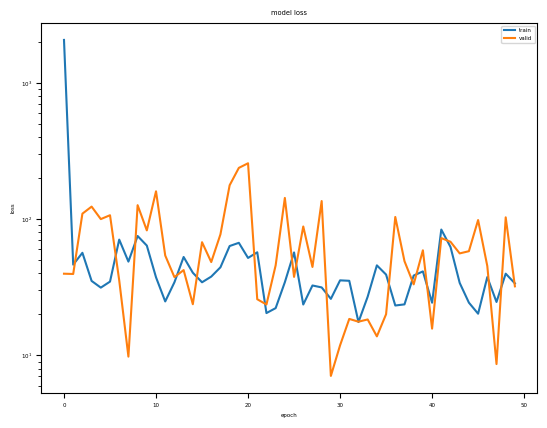

In [23]:
# モデル評価
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.yscale('log')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right');

In [24]:
# 予測確率を取得（positive class）
# probabilities = model.predict(X_val[numeric_cols])
probabilities = model.predict(X_val)
pd.DataFrame(probabilities).head()

7/7 [==============================] - 0s 4ms/step


,0
0,0.000000e+00
1,0.000000e+00
2,0.000000e+00
3,1.107002e-20
4,0.000000e+00


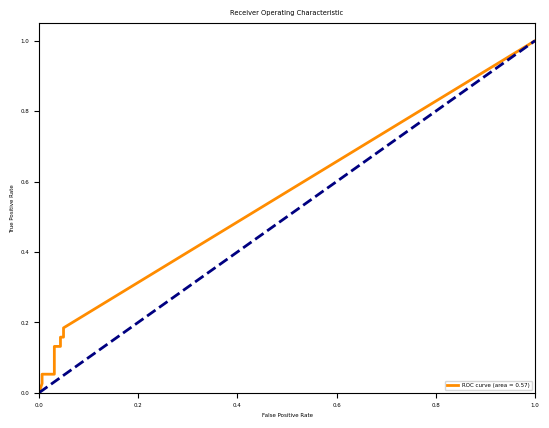

In [25]:
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
# ROCカーブを計算
fpr, tpr, thresholds = roc_curve(y_val, probabilities)

# AUCを計算
roc_auc = auc(fpr, tpr)

# ROCカーブをプロット
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

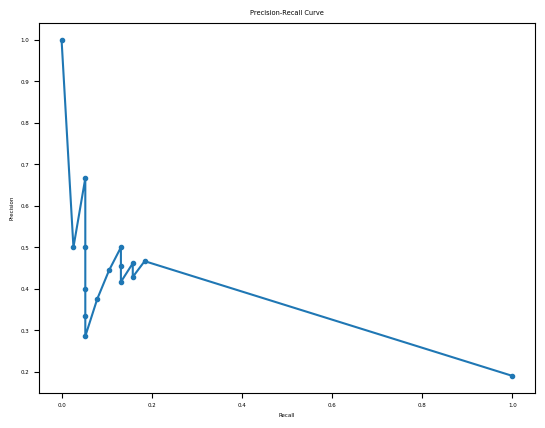

In [26]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Precision-Recallカーブを計算
precision, recall, thresholds = precision_recall_curve(y_val, probabilities)

# Precision-Recallカーブをプロット
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [27]:
# F1スコアを計算
f1_scores = 2*(precision*recall)/(precision+recall)

# F1スコアが最大となる閾値を探す
threshold_optimal = thresholds[np.argmax(f1_scores)]

print(f'Threshold Optimal: {threshold_optimal}')

Threshold Optimal: 0.0


In [28]:
# ROC曲線の各点に対応する閾値を取得
fpr, tpr, thresholds = roc_curve(y_val, probabilities)

# 最適な閾値を見つける（TPR - FPRが最大となる閾値）
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

print(f'Optimal Threshold: {optimal_threshold}')

Optimal Threshold: 1.9113170152183275e-38


In [29]:
threshold_optimal = 0.65
# 確率を二値に変換
#predictions = [1 if prob > optimal_threshold else 0 for prob in probabilities]
predictions = [1 if prob > threshold_optimal else 0 for prob in probabilities]

In [30]:
from sklearn.metrics import precision_score, recall_score

# 真の答えを第一引数、予測を第二引数に入れ、平均方法としてmacroを指定
recall_score(y_val, predictions)

0.05263157894736842

In [31]:
#真の答えを第一引数、予測を第二引数に入れ、平均方法としてmacroを指定
precision_score(y_val, predictions)

0.6666666666666666

In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(y_val, predictions)

0.815

True Positives(不正利用→不正利用): 2
False Positives(正常利用→不正利用): 1
True Negatives(正常利用→正常利用): 161
False Negatives(不正利用→正常利用): 36


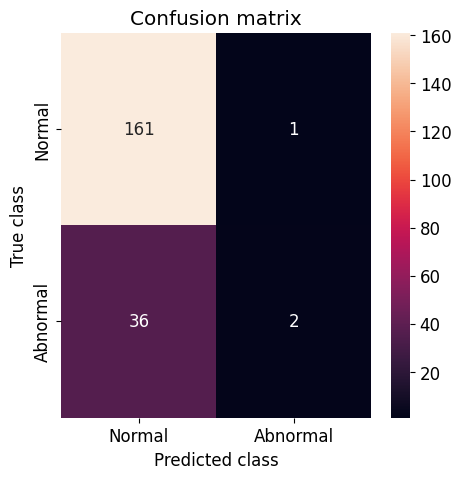

In [33]:
from sklearn.metrics import confusion_matrix

# 混同行列を作成
cm = confusion_matrix(y_val, predictions)

# 混同行列からTP, FP, TN, FNを取得
tn, fp, fn, tp = cm.ravel()
plt.rcParams["font.size"] = 12

print(f"True Positives(不正利用→不正利用): {tp}")
print(f"False Positives(正常利用→不正利用): {fp}")
print(f"True Negatives(正常利用→正常利用): {tn}")
print(f"False Negatives(不正利用→正常利用): {fn}")
plt.figure(figsize=(5, 5))
sns.heatmap(cm, xticklabels=["Normal","Abnormal"], yticklabels=["Normal","Abnormal"], annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [34]:
y_val_frame = y_val.to_frame()
y_val_frame.describe()

,target
count,200.000000
mean,0.190000
std,0.393285
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


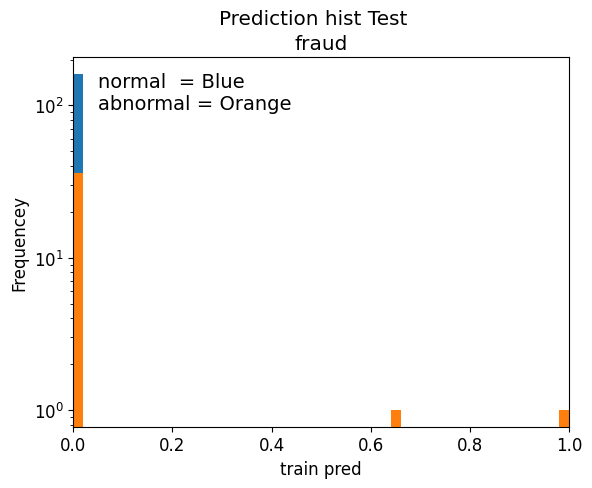

In [35]:
y_pred_train = probabilities

y_pred_label_normal = y_pred_train[y_val==0]
y_pred_label_fraud = y_pred_train[y_val==1]

f, (ax) = plt.subplots()
f.suptitle('Prediction hist Test')

bins = 50

ax.hist(y_pred_label_normal, bins = bins)
ax.set_title('normal')

ax.hist(y_pred_label_fraud, bins = bins)
ax.set_title('fraud')

plt.xlabel('train pred')
plt.ylabel('Frequencey')
plt.xlim((0, 1))
plt.yscale('log')
plt.text(0.05, 0.92, 'normal  = Blue',transform = ax.transAxes, fontsize = 14)
plt.text(0.05, 0.86, 'abnormal = Orange',transform = ax.transAxes, fontsize = 14)
plt.show()

In [ ]:
import shap

# データのサンプルを作成（ここでは訓練データの最初の100行を使用）
X_sample = X_train_res[numeric_cols].iloc[:50, :]

# Explainerの作成
explainer = shap.KernelExplainer(model.predict, X_sample)

# SHAP値の計算（ここでは検証データの最初の50行に対して計算）
shap_values = explainer.shap_values(X_val[numeric_cols].iloc[:50, :])

# SHAP値のプロット
shap.summary_plot(shap_values, X_val[numeric_cols].iloc[:50, :])

2/2 [==============================] - 0s 6ms/step


  0%|          | 0/50 [00:00<?, ?it/s]

2848/3238 [=========================>....] - ETA: 0s